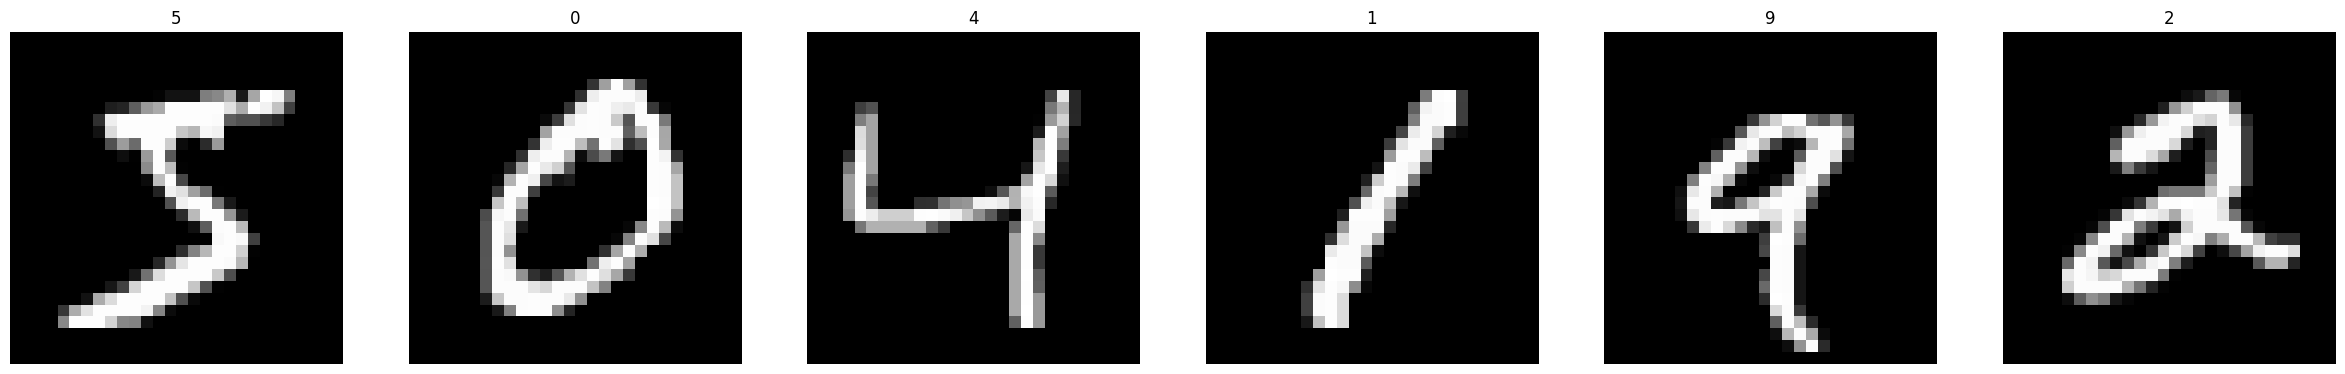

In [25]:
# %% load dataset and proprocessing (normalization, one-hot encoding)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist # veri seti
from tensorflow.keras.utils import to_categorical # encoding
from tensorflow.keras.models import Sequential #Sirali base model
from tensorflow.keras.layers import Conv2D, MaxPooling2D # feature extraction
from tensorflow.keras.layers import Flatten, Dense, Dropout #Classification
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator #data augmentation

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# load mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# gorsellestirmre
class_labels = ["0","1","2","3","4","5","6","7","8","9"]
fig, axes = plt.subplots(1,6, figsize = (30,24))

for i in range(6):
    axes[i].imshow(x_train[i], cmap = "gray")
    label = class_labels[y_train[i]]
    axes[i].set_title(label)
    axes[i].axis("off")
plt.show()

# veri seti normalizasyon
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("int32") / 255

# reshape for grayscale (add channel dimension)
x_train = np.expand_dims(x_train, axis =- 1)
x_test = np.expand_dims(x_test, axis =-1 )

#one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
# %% veri arttirimi (data augmentation)
datagen = ImageDataGenerator(
            rotation_range = 20, # 20 dereceye kadar dondurme saglar
            width_shift_range = 0.2, # goruntuyu yatayda %20 kaydirma
            height_shift_range = 0.2, # goruntuyu dikeyde %20 kaydirma,,
            shear_range = 0.2, # goruntu uzerinde kaydırma
            zoom_range = 0.2, # goruntu uzerinde zoom in ve out uygulama
            horizontal_flip = True, # goruntu yatayda ters cevrilecek
            fill_mode = "nearest" # bos alanlari doldurmak icin en yakin piksel degerlerini kullan
    )
datagen.fit(x_train) #data augmentation i egitim veriler uzerinde uygula

In [45]:
# %% model create, compile and train

# cnn modeli olustur
model = Sequential()

# feature extraction: conv -> relu -> conv -> relu -> pool ->  dropout
# 32 cell(filtre), 3x3 filtre boyutu
model.add(Conv2D(32,(3,3), padding = "same", activation = "relu", input_shape = x_train.shape[1:]))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25)) #baglantilarin %25 i rastgele bir sekilde aktif olmayacak

# feature extraction: conv -> relu -> conv -> relu -> pool ->  dropout
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# classification: flatten -> dense -> relu -> dropout -> output
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(optimizer = RMSprop(learning_rate = 0.001, decay = 1e-6),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# model training
history = model.fit(datagen.flow(x_train, y_train, batch_size = 512),
                   epochs = 20,
                   validation_data = (x_test,y_test))
                

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889,834 (3.39 MB)

 Trainable params: 889,834 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.2828 - loss: 1.9782 - val_accuracy: 0.7677 - val_loss: 0.6853
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 44s 375ms/step - accuracy: 0.6638 - loss: 1.0129 - val_accuracy: 0.9236 - val_loss: 0.2572
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.7796 - loss: 0.6783 - val_accuracy: 0.9141 - val_loss: 0.2910
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.8404 - loss: 0.5053 - val_accuracy: 0.9661 - val_loss: 0.1041
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.8793 - loss: 0.3899 - val_accuracy: 0.9690 - val_loss: 0.0877
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9017 - loss: 0.3209 - val_accuracy: 0.9775 - val_loss: 0.0732
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.9153 - loss: 0.2757 - val_accuracy: 0.9792 - val_loss: 0.0640
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - accuracy: 0.9239 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



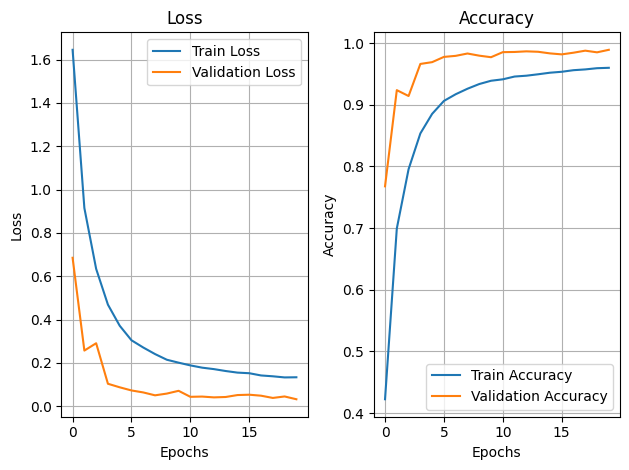

In [51]:
# %% test model and evaluate performance

# modelin testveri seti uzerindeki tahminleri
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

plt.figure()

#loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.grid(True)

#accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()